In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
matches = pd.read_csv('../../../static/data/dataset_3/IPL_Matches_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
matches.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [5]:
matches.shape

(950, 20)

In [6]:
matches.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [7]:
# Rename old names to new names
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


matches['TossWinner'] = matches['TossWinner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['TossWinner'] = matches['TossWinner'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['TossWinner'] = matches['TossWinner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['TossWinner'] = matches['TossWinner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')


matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [8]:
# Current teams in IPl
current_teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [9]:
# Setting data of current teams only
matches = matches[matches['Team1'].isin(current_teams)]
matches = matches[matches['Team2'].isin(current_teams)]
matches = matches[matches['TossWinner'].isin(current_teams)]
matches = matches[matches['WinningTeam'].isin(current_teams)]

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

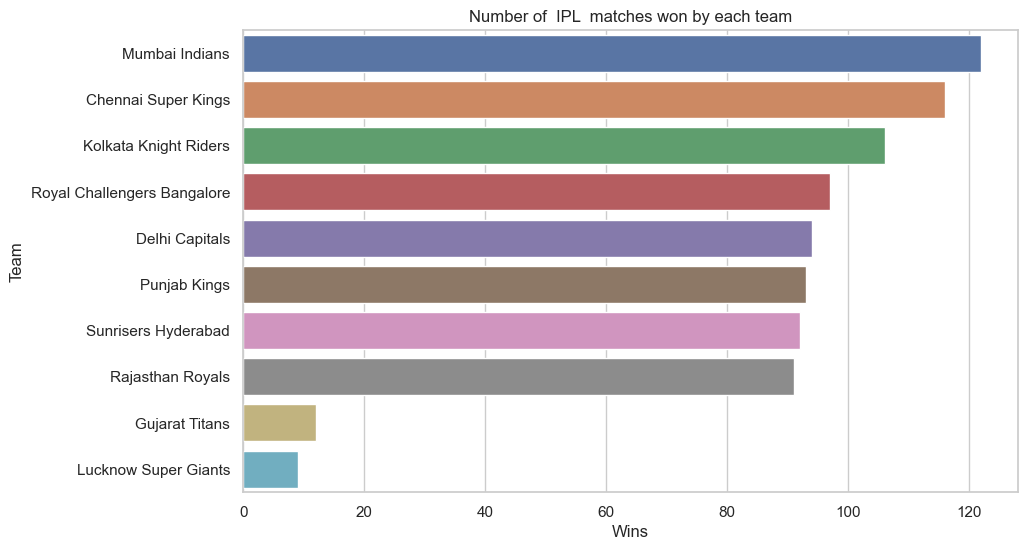

In [42]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'WinningTeam',data = matches,order= matches['WinningTeam'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

In [11]:
matches['Season'] = matches['Season'].str.replace('2007/08', '2008')
matches['Season'] = matches['Season'].str.replace('2009/10', '2010')
matches['Season'] = matches['Season'].str.replace('2020/21', '2020')

In [12]:
# Season wise number of matches played
matches_per_season = matches['Season'].value_counts()
matches_per_season = matches_per_season.sort_index()
matches_per_season

Season
2008    58
2009    57
2010    60
2011    46
2012    58
2013    60
2014    60
2015    57
2016    32
2017    31
2018    60
2019    59
2020    60
2021    60
2022    74
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of  IPL  matches played in each season')

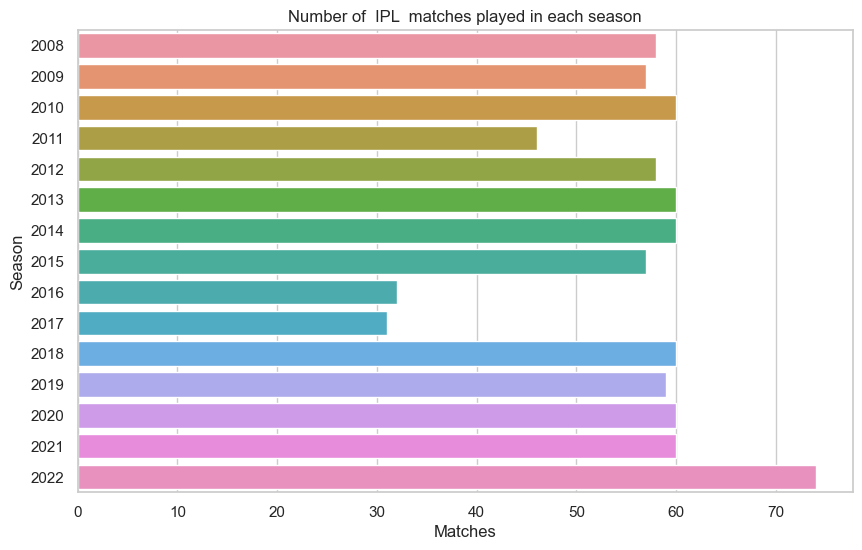

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'Season', data = matches, order= matches_per_season.index)
plt.xlabel('Matches')
plt.ylabel('Season')
plt.title('Number of  IPL  matches played in each season')

### Number of matches played in each season by each team

In [14]:
matches_by_team_1 = matches.groupby('Season')['Team1'].value_counts()
matches_by_team_1 = matches_by_team_1.reset_index()
matches_by_team_1

,Season,Team1,count
0,2008,Chennai Super Kings,9
1,2008,Sunrisers Hyderabad,7
2,2008,Delhi Capitals,7
3,2008,Rajasthan Royals,7
4,2008,Royal Challengers Bangalore,7
...,...,...,...
112,2022,Gujarat Titans,7
113,2022,Mumbai Indians,5
114,2022,Kolkata Knight Riders,5
115,2022,Delhi Capitals,5


In [15]:
matches_by_team_2 = matches.groupby('Season')['Team2'].value_counts()
matches_by_team_2 = matches_by_team_2.reset_index()
matches_by_team_2

,Season,Team2,count
0,2008,Rajasthan Royals,9
1,2008,Punjab Kings,8
2,2008,Sunrisers Hyderabad,7
3,2008,Royal Challengers Bangalore,7
4,2008,Mumbai Indians,7
...,...,...,...
112,2022,Lucknow Super Giants,7
113,2022,Royal Challengers Bangalore,7
114,2022,Punjab Kings,5
115,2022,Rajasthan Royals,4


In [16]:
# Number of matches won by each team
matches_won_by_teams = matches.groupby('Season')['WinningTeam'].value_counts()
matches_won_by_teams = matches_won_by_teams.reset_index()
matches_won_by_teams

,Season,WinningTeam,count
0,2008,Rajasthan Royals,13
1,2008,Punjab Kings,10
2,2008,Chennai Super Kings,9
3,2008,Mumbai Indians,7
4,2008,Delhi Capitals,7
...,...,...,...
113,2022,Delhi Capitals,7
114,2022,Kolkata Knight Riders,6
115,2022,Sunrisers Hyderabad,6
116,2022,Mumbai Indians,4


In [61]:
def matches_won_season(season, team):
    result = matches_won_by_teams[(matches_won_by_teams['Season'] == season) & (matches_won_by_teams['WinningTeam'] == team)]
    return result

In [65]:
res = matches_won_season('2022', 'Delhi Capitals')
res

,Season,WinningTeam,count
113,2022,Delhi Capitals,7


In [17]:
# matches_won_by_teams = matches_won_by_teams.unstack()
# matches_won_by_teams.plot(kind='bar')
# plt.show()

<Figure size 1000x600 with 0 Axes>

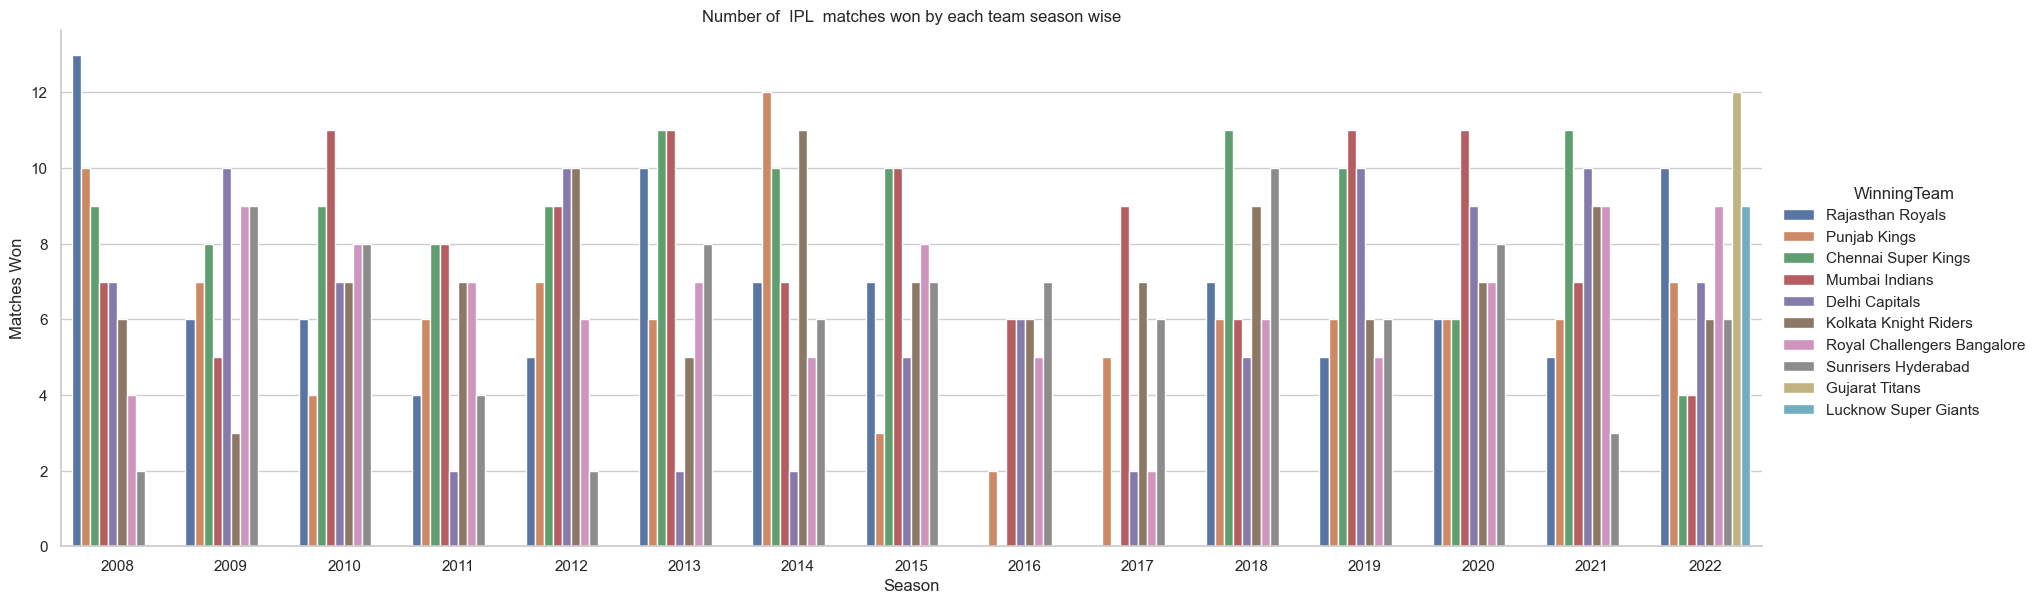

In [58]:
plt.figure(figsize = (10, 6))
sns.catplot(x = 'Season', y = 'count', hue='WinningTeam', kind='bar', data = matches_won_by_teams, height=6, aspect=3)
plt.xlabel('Season')
plt.ylabel('Matches Won')
plt.title('Number of  IPL  matches won by each team season wise')
plt.show()